In [1]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

I=0.1 A, m ax B(r=0): 0.315 G, max B(r=42.5mm) 0.541 G
I=0.2 A, m ax B(r=0): 0.629 G, max B(r=42.5mm) 1.082 G
I=0.3 A, m ax B(r=0): 0.944 G, max B(r=42.5mm) 1.623 G
I=0.4 A, m ax B(r=0): 1.258 G, max B(r=42.5mm) 2.164 G
I=0.5 A, m ax B(r=0): 1.573 G, max B(r=42.5mm) 2.705 G
I=0.6 A, m ax B(r=0): 1.887 G, max B(r=42.5mm) 3.246 G
I=0.7 A, m ax B(r=0): 2.202 G, max B(r=42.5mm) 3.787 G
I=0.8 A, m ax B(r=0): 2.516 G, max B(r=42.5mm) 4.328 G
I=0.9 A, m ax B(r=0): 2.831 G, max B(r=42.5mm) 4.869 G
I=1.0 A, m ax B(r=0): 3.145 G, max B(r=42.5mm) 5.410 G


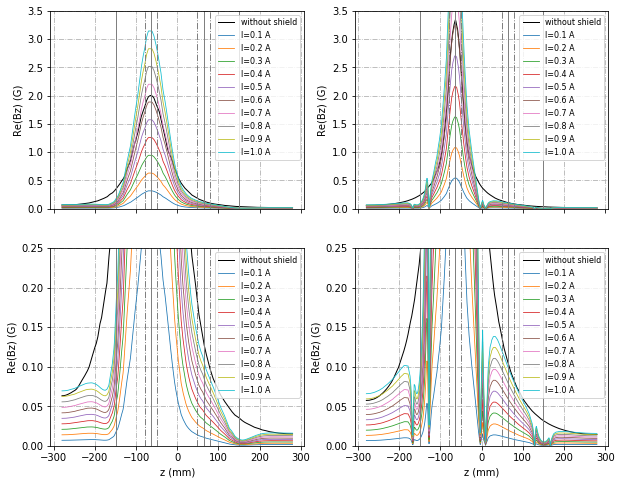

In [6]:
df0c =  pd.read_csv('data_RF/OuterShieldingPosition/NoShielding/Y=0mmPlotTangent.txt', comment='%', sep='\s+', names=['length', '|B|', 'ReB', 'ImB'])
df0off =  pd.read_csv('data_RF/OuterShieldingPosition/NoShielding/Y=42.5mmPlotTangent.txt', comment='%', sep='\s+',names=['length', '|B|', 'ReB', 'ImB'])

B_cm_list = []
B_cp_list = []
B_140_list = []
B_145_list = []
B_150_list = []


Bf_cm_list = []
Bf_cp_list = []
Bf_140_list = []
Bf_145_list = []
Bf_150_list = []


df0off['B_G'] = np.abs(df0off['ReB'])*1e4
df0off['z_mm'] = (df0off['length']-28)*10
df0c['B_G'] = np.abs(df0c['ReB'])*1e4
df0c['z_mm'] = (df0c['length']-28)*10

fig4, ax4 = plt.subplots(2,2, figsize=(10,8), sharex=True, )

ax4[0,0].plot(df0c['z_mm'], df0c['B_G'], lw=1, label='without shield', c='k')
ax4[1,0].plot(df0c['z_mm'], df0c['B_G'], lw=1, label='without shield', c='k')
ax4[0,1].plot(df0off['z_mm'], df0off['B_G'], lw=1, label='without shield', c='k')
ax4[1,1].plot(df0off['z_mm'], df0off['B_G'], lw=1, label='without shield', c='k')
for i in range(2):
    ax4[1,i].set_ylim(0, 0.25)
    ax4[0,i].set_ylim(0, 3.5)
    ax4[0,i].grid('both', ls='-.')
    ax4[1,i].grid('both', ls='-.')

ls_list = [i for i in range(1, 11)]
# ls_list = [5*i for i in range(2, 5)]
# ls_list = [5*i for i in range(0,2)]
for ls in ls_list:
    

    df_i = pd.read_csv('data_RF/CurrentSweep/%se-1A/Y=0mmPlotTangent.txt' %ls, comment='%', sep='\s+', names=['length', '|B|', 'ReB', 'ImB'])
    df_i['B_G'] = np.abs(df_i['ReB'])*1e4
    df_i['z_mm'] = (df_i['length']-28)*10

    df_ioff = pd.read_csv('data_RF/CurrentSweep/%se-1A/Y=42.5mmPlotTangent.txt' %ls , comment='%', sep='\s+', names=['length', '|B|', 'ReB', 'ImB'])
    df_ioff['z_mm'] = (df_ioff['length']-28)*10
    df_ioff['B_G'] = np.abs(df_ioff['ReB'])*1e4


    B_cm_list.append(df_i['B_G'][216])
    B_cp_list.append(df_i['B_G'][343])
    B_140_list.append(df_i['B_G'][130])
    B_145_list.append(df_i['B_G'][135])
    B_150_list.append(df_i['B_G'][140])

    Bf_cm_list.append(df_ioff['B_G'][216])
    Bf_cp_list.append(df_ioff['B_G'][343])
    Bf_140_list.append(df_ioff['B_G'][130])
    Bf_145_list.append(df_ioff['B_G'][135])
    Bf_150_list.append(df_ioff['B_G'][140])



    ax4[0,0].plot(df_i['z_mm'], df_i['B_G'], lw=.8, label= 'I=%.1f A' %(ls/10))
    ax4[1,0].plot(df_i['z_mm'], df_i['B_G'], lw=.8 ,label= 'I=%.1f A' %(ls/10))
    ax4[0,1].plot(df_ioff['z_mm'], df_ioff['B_G'], lw=.8,label= 'I=%.1f A' %(ls/10))
    ax4[1,1].plot(df_ioff['z_mm'], df_ioff['B_G'], lw=.8 ,label= 'I=%.1f A' %(ls/10))

    print ("I=%.1f A, m ax B(r=0): %.3f G, max B(r=42.5mm) %.3f G" %( ls/10, np.max(df_i['B_G']), np.max(df_ioff['B_G']) ))
for i in range(2):
    for j in range(2):
        ax4[i,j].legend(fontsize=8, loc='upper right')
        ax4[i,j].set_ylabel('Re(Bz) (G)')
        ax4[i,j].axvline(-64, lw=1, ls='-', color='gray')
        ax4[i,j].axvline(64, lw=1, ls='-', color='gray')
        ax4[i,j].axvline(-150, lw=1, ls='-', color='gray')
        ax4[i,j].axvline(150, lw=1, ls='-', color='gray')
        ax4[i,j].axvline(-64+15, lw=1, ls='-.', color='gray')
        ax4[i,j].axvline(-64-15, lw=1, ls='-.', color='gray')
        ax4[i,j].axvline(64+15, lw=1, ls='-.', color='gray')
        ax4[i,j].axvline(64-15, lw=1, ls='-.', color='gray')
        ax4[1,j].set_xlabel('z (mm)')
fig4.savefig('Al_and_Cu__I_sweep')